Matplotlib is building the font cache; this may take a moment.


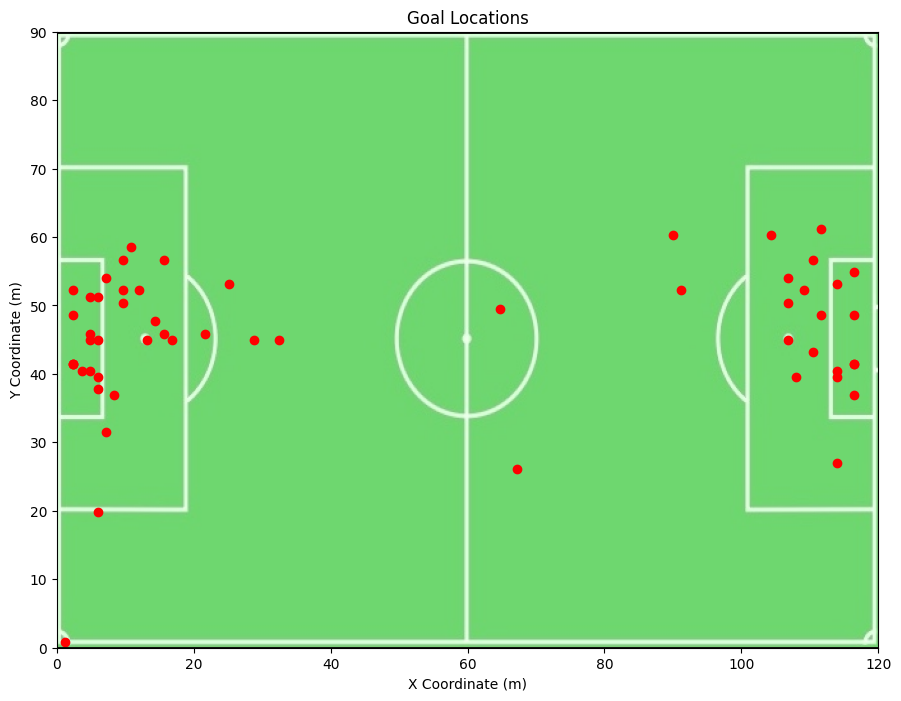

In [ ]:
'''Generates a visualisation of all goals on a green football field across both sides of the field'''
import matplotlib.pyplot as plt
import pandas as pd  
import os  

# Define soccer field dimensions  
field_length = 120  # Length of the field in meters (between 100 and 110 meters)  
field_width = 90    # Width of the field in meters (between 64 and 75 meters)
  
# Path of the Excel file  
file_path = "./FcBayernWomenGoals.xlsx"
  
# Read the data from the Excel file  
data = pd.read_excel(file_path)  
  
# Calculate the scaled x and y coordinates  
x = data['X'] * field_length / 100  
y = field_width - (data['Y'] * field_width / 100)  # Flipping the y-values
  
# Load and display the image of the field as a background  
img = plt.imread("./football-background.jpeg")  
  
# Create the visualization with the field image as background  
plt.figure(figsize=(12, 8))  
plt.imshow(img, extent=[0, field_length, 0, field_width], alpha=0.8)  # Adjust alpha for a denser blue color  
  
# Plot the points on the field  
plt.scatter(x, y, c='red')  # Change color as needed  

plt.title('Goal Locations')  
plt.xlabel('X Coordinate (m)')  
plt.ylabel('Y Coordinate (m)')  
  
# Add soccer field lines  
plt.axhline(y=0, color='black', linewidth=2)  # Bottom line of the field  
plt.axhline(y=field_width, color='black', linewidth=2)  # Top line of the field  
  
# Save the figure as an SVG in the same directory as the Excel file  
output_path = "./GoalLocationsBothSides.jpg"  
plt.savefig(output_path)  
  
plt.show()

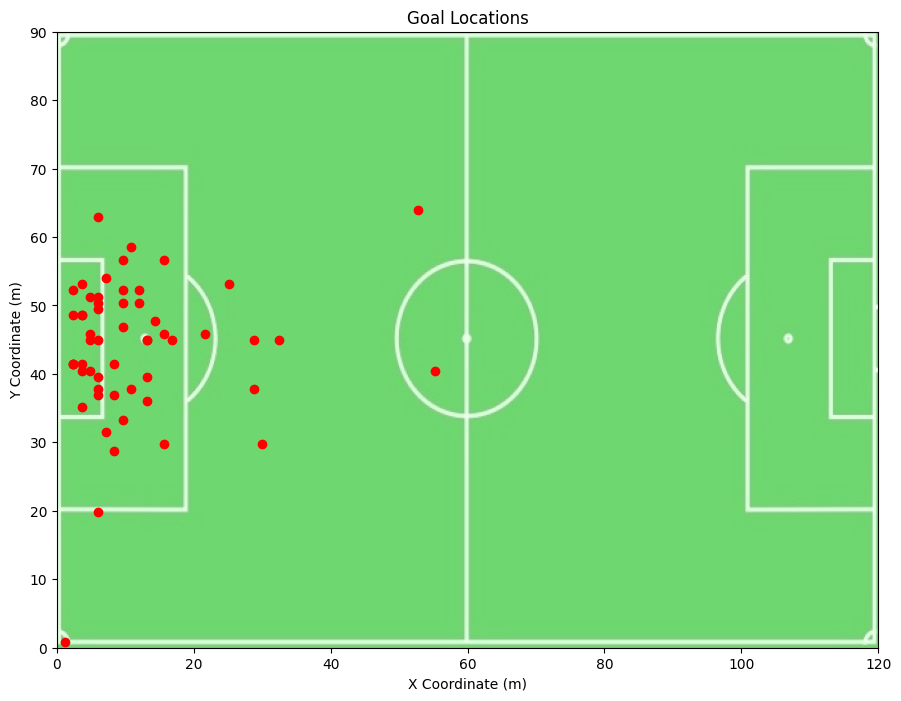

In [3]:
'''Generates a visualisation of all goals on a green football field combined on one half of the field. 
Half of them needed to be inverted to properly match the location they were shot from.
In the FC Bayern data this could be tested and understood by the corner-kick goal.'''

import matplotlib.pyplot as plt  
import pandas as pd
import os  
  
# Define soccer field dimensions  
field_length = 120  # Length of the field in meters  
field_width = 90    # Width of the field in meters  
  
# Path of the Excel file  
file_path = "./FcBayernWomenGoals.xlsx"
  
# Read the data from the Excel file  
data = pd.read_excel(file_path)  
  
# Calculate the initial x and y coordinates  
x = data['X'] * field_length / 100
y = data['Y'] * field_width / 100  # No initial flipping
  
# Identify dots with x-values between 0 and 50
mask_low_x = (x <= 60)  # x-values between 0 and 50

# Reverse y-axis for these dots
y[mask_low_x] = field_width - y[mask_low_x]  # Flips y-coordinate

# Identify dots with x-values greater than 50
mask_high_x = (x > 60)

# Convert x-coordinate for dots with high x-values to be in the 0-to-50 range
x[mask_high_x] = field_length - x[mask_high_x]

# Load and display the image of the field as a background  
img = plt.imread("./football-background.jpeg")  
  
# Create the visualization with the field image as background  
plt.figure(figsize=(12, 8))  
plt.imshow(img, extent=[0, field_length, 0, field_width], alpha=0.8)  
  
# Plot the points on the field  
plt.scatter(x, y, c='red')  

plt.title('Goal Locations')  
plt.xlabel('X Coordinate (m)')  
plt.ylabel('Y Coordinate (m)')
  
# Save the figure in the same directory as the Excel file  
output_path = "./GoalLocationsOneSide.jpg"
plt.savefig(output_path)  
  
plt.show()

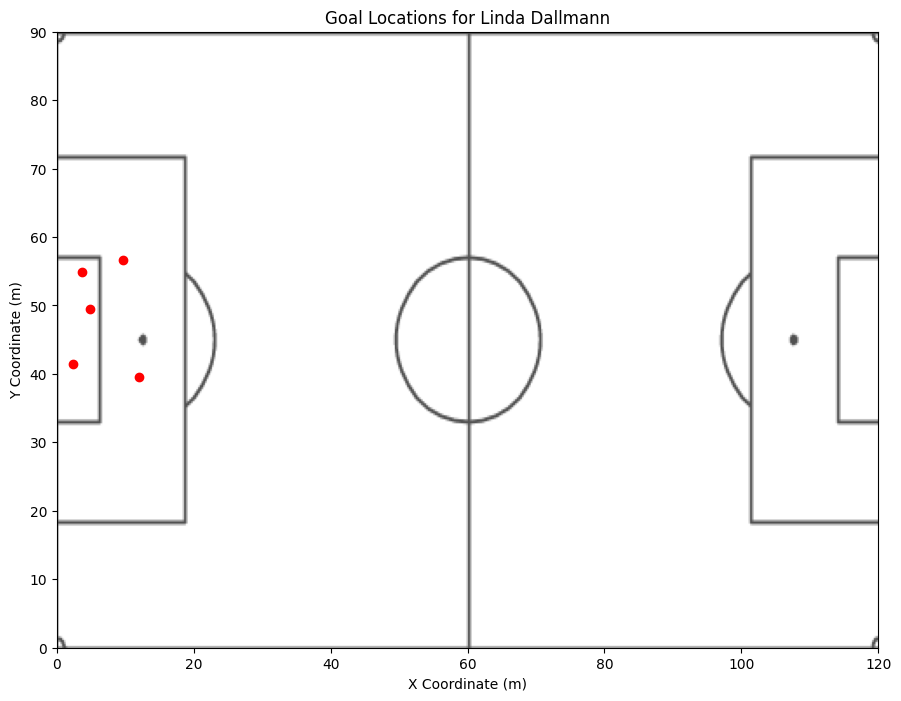

In [4]:
'''Generates a visualisation of the goals for one specific player on a white football field combined on one half of the field'''
import matplotlib.pyplot as plt  
import pandas as pd  
import os  
  
# Define soccer field dimensions  
field_length = 120  # Length of the field in meters  
field_width = 90    # Width of the field in meters  
  
# Path of the Excel file  
file_path = "./FcBayernWomenGoals.xlsx"
export_path = "./"

# Read the data from the Excel file  
data = pd.read_excel(file_path)  
  
# Filter by goal scorer (example name: "Jane Doe")  
goal_scorer = "Linda Dallmann"  # Change to the name of the player you want to visualize  
filtered_data = data[data['GOALSCORER'] == goal_scorer]

# Calculate the x and y coordinates for the filtered data  
x = filtered_data['X'] * field_length / 100
y = filtered_data['Y'] * field_width / 100  
  
# Adjust x and y coordinates as needed  
mask_low_x = (x <= 60)  # x-values between 0 and 60
y[mask_high_x] = field_width - y[mask_high_x]  # Flips y-coordinate for converted x-coordinates


mask_high_x = (x > 60)  # x-values greater than 60
x[mask_high_x] = field_length - x[mask_high_x]

# Load and display the image of the field as a background  
img = plt.imread("./white_football_pitch.png")  
  
# Create the visualization with the field image as background  
plt.figure(figsize=(12, 8))  
plt.imshow(img, extent=[0, field_length, 0, field_width], alpha=0.8)  
  
# Plot the points for the specified goal scorer  
plt.scatter(x, y, c='red')  

plt.title(f'Goal Locations for {goal_scorer}')  
plt.xlabel('X Coordinate (m)')  
plt.ylabel('Y Coordinate (m)')  
  
# Save the figure in the same directory as the Excel file  
output_path = os.path.join(export_path, f"{goal_scorer}.replace(' ', '_')_spots.jpg")

plt.savefig(output_path)  

plt.show()



/var/folders/y8/09q93vbd5_x1j547qfrv9fd00000gn/T/ipykernel_5064/1093148593.py:70: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.Rectangle(


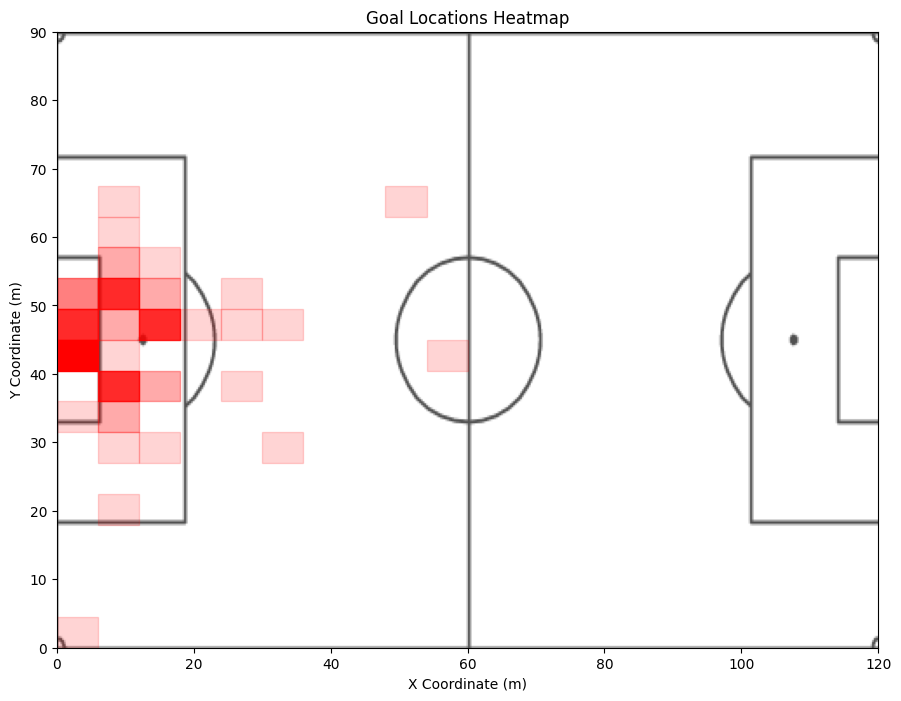

Top 10 squares with the highest number of goals:
1. Square at (x=0.0, y=40.5): 6.0 goals
2. Square at (x=6.0, y=36.0): 5.0 goals
3. Square at (x=6.0, y=49.5): 5.0 goals
4. Square at (x=0.0, y=45.0): 5.0 goals
5. Square at (x=12.0, y=45.0): 5.0 goals
6. Square at (x=0.0, y=49.5): 3.0 goals
7. Square at (x=12.0, y=49.5): 2.0 goals
8. Square at (x=6.0, y=45.0): 2.0 goals
9. Square at (x=6.0, y=54.0): 2.0 goals
10. Square at (x=6.0, y=31.5): 2.0 goals


In [5]:
'''Generates a heatmap of all goals on one half of the field'''
import matplotlib.pyplot as plt  
import pandas as pd  
import numpy as np  
import os  

# Define soccer field dimensions
field_length = 120  # Length of the field in meters  
field_width = 90    # Width of the field in meters  

# Path of the Excel file
file_path = "./FcBayernWomenGoals.xlsx"

# Read the data from the Excel file
data = pd.read_excel(file_path)  

# Calculate the x and y coordinates
x = data['X'] * field_length / 100  
y = data['Y'] * field_width / 100  # No initial flipping

# Identify dots with x-values between 0 and 50
mask_low_x = (x <= 60)  # x-values between 0 and 50

# Reverse y-axis for these dots
y[mask_low_x] = field_width - y[mask_low_x]

# Identify dots with x-values greater than 50
mask_high_x = (x > 60)

# Convert x-coordinate for dots with high x-values to be in the 0-to-50 range
x[mask_high_x] = field_length - x[mask_high_x]

# Define the grid: let's use 10x10 squares for simplicity
num_squares_x = 20
num_squares_y = 20

# Create a 2D array to store the goal counts in each square
goal_counts = np.zeros((num_squares_x, num_squares_y))

# Define the size of each square
square_length = field_length / num_squares_x
square_width = field_width / num_squares_y

# Count the number of goals in each square
for xi, yi in zip(x, y):
    if not np.isnan(xi) and not np.isnan(yi):
        x_index = int(xi // square_length)
        y_index = int(yi // square_width)
        goal_counts[x_index, y_index] += 1

# Find the maximum goal count to set the color intensity
max_goal_count = np.max(goal_counts)

# Load the background image for the soccer pitch
img = plt.imread("./white_football_pitch.png")

# Create the visualization with the field image as background
plt.figure(figsize=(12, 8))  
plt.imshow(img, extent=[0, field_length, 0, field_width], alpha=0.8) 

# Plot the grid squares with intensity based on the goal counts
for i in range(num_squares_x):
    for j in range(num_squares_y):
        if goal_counts[i, j] > 0:
            color_intensity = goal_counts[i, j] / max_goal_count  # Normalize the intensity
            plt.gca().add_patch(
                plt.Rectangle(
                    (i * square_length, j * square_width),
                    square_length,
                    square_width,
                    color=(1, 0, 0, color_intensity),  # Red with varying alpha
                    linewidth=1,
                    edgecolor='black'
                )
            )

plt.title('Goal Locations Heatmap')  
plt.xlabel('X Coordinate (m)')  
plt.ylabel('Y Coordinate (m)')  

# Save the figure in the same directory as the Excel file
output_path = "./goal_locations_heatmap.jpg"
plt.savefig(output_path)  
  
plt.show()

# Find the top 10 squares with the most goals
top_10_indices = np.unravel_index(np.argsort(-goal_counts.ravel())[:10], goal_counts.shape)
top_10_counts = [goal_counts[i][j] for i, j in zip(*top_10_indices)]

print("Top 10 squares with the highest number of goals:")
for idx, (i, j) in enumerate(zip(*top_10_indices)):
    print(f"{idx + 1}. Square at (x={i * square_length}, y={j * square_width}): {goal_counts[i][j]} goals")
